## Ejercicio 2: Comparar muestras de una Geométrica 

In [1]:
import numpy as np
from scipy.stats import geom, chi2_contingency, ks_2samp

# Parámetros para la distribución y tamaño de muestra

p = 0.7  # Probabilidad de éxito para la distribución geométrica
N = 1000  # Tamaño de la muestra

In [2]:
# Generar la muestra teórica usando scipy.stats
teorica_muestra = geom.rvs(p, size=N)

In [3]:
# Generar la muestra empírica usando el método de la transformada inversa

from Generator import generator

def ffinv(y, p):
    return np.ceil(np.log(1 - y) / np.log(1 - p))

def finv(y):
    return ffinv(y, p)

empirica_muestra = generator(finv, N).astype(int)

### Chi-Cuadrado

In [ ]:
# Crear una tabla de frecuencias de observación para cada muestra
teorica_counts = np.bincount(teorica_muestra)
empirica_counts = np.bincount(empirica_muestra)

# Asegurarse de que ambas tengan el mismo tamaño de categorías
max_len = max(len(teorica_counts), len(empirica_counts))
teorica_counts = np.pad(teorica_counts, (0, max_len - len(teorica_counts)), mode='constant')
empirica_counts = np.pad(empirica_counts, (0, max_len - len(empirica_counts)), mode='constant')

# Eliminar categorías donde ambos conteos son cero
non_zero_indices = (teorica_counts != 0) | (empirica_counts != 0)
teorica_counts = teorica_counts[non_zero_indices]
empirica_counts = empirica_counts[non_zero_indices]

# Realizar la prueba de Chi Cuadrado
chi2_stat, p_val_chi2, dof, expected = chi2_contingency([teorica_counts, empirica_counts])

print("Prueba de Chi Cuadrado")
print(f"Estadística de Chi Cuadrado: {chi2_stat}")
print(f"p-valor: {p_val_chi2}")


# Conclusión basada en un nivel de significancia α = 0.05
if p_val_chi2 > 0.05:
    print("\nConclusión de Chi Cuadrado: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.")
else:
    print("\nConclusión de Chi Cuadrado: Se rechaza la hipótesis nula; las muestras presentan una diferencia significativa.")




Prueba de Chi Cuadrado
Estadística de Chi Cuadrado: 1.1942871536227349
p-valor: 0.9454242600720171

Conclusión de Chi Cuadrado: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.


### Kolmogorov-Smirnov

In [ ]:
ks_stat, p_val_ks = ks_2samp(teorica_muestra, empirica_muestra)

print("\nPrueba de Kolmogorov-Smirnov")
print(f"Estadística KS: {ks_stat}")
print(f"p-valor: {p_val_ks}")

# Conclusión basada en un nivel de significancia α = 0.05
if p_val_ks > 0.05:
    print("\nConclusión de Kolmogorov-Smirnov: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.")
else:
    print("\nConclusión de Kolmogorov-Smirnov: Se rechaza la hipótesis nula; las muestras presentan una diferencia significativa.")


Prueba de Kolmogorov-Smirnov
Estadística KS: 0.007
p-valor: 0.9999999999999997

Conclusión de Kolmogorov-Smirnov: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.


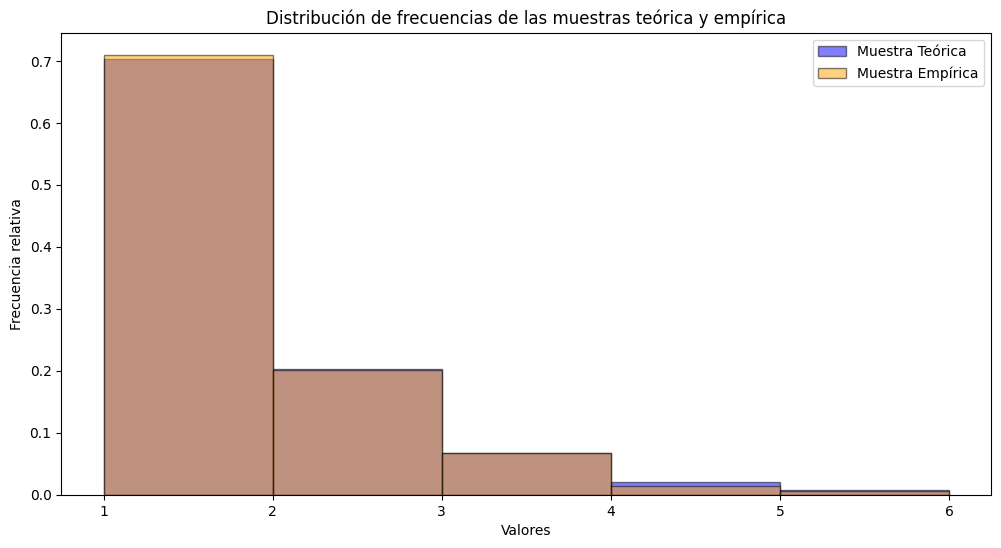

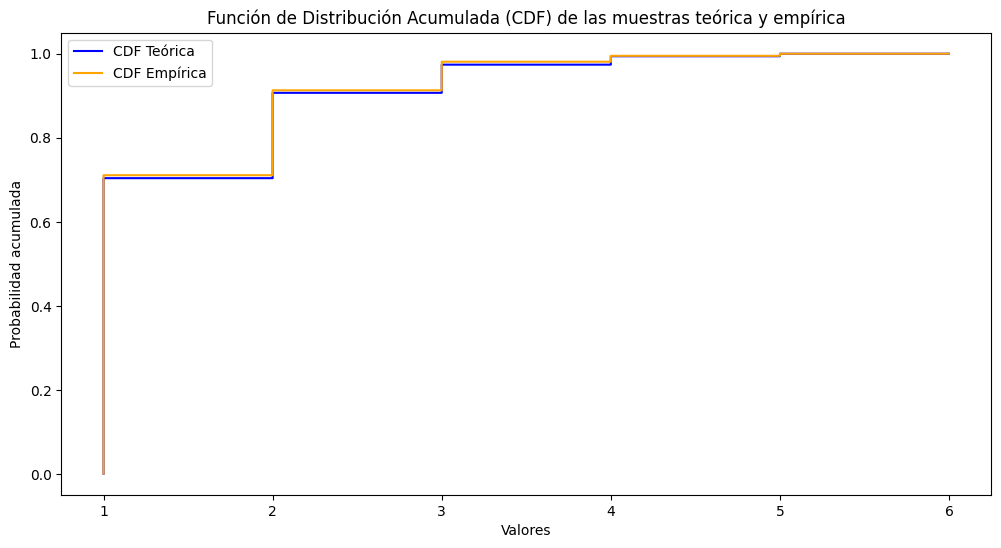

In [11]:
import matplotlib.pyplot as plt

# Gráfico 1: Distribución de frecuencias (histograma) para ambas muestras
plt.figure(figsize=(12, 6))

# Histograma para la muestra teórica
plt.hist(teorica_muestra, bins=np.arange(teorica_muestra.min(), teorica_muestra.max() + 1), 
         alpha=0.5, label='Muestra Teórica', color='blue', edgecolor='black', density=True)

# Histograma para la muestra empírica
plt.hist(empirica_muestra, bins=np.arange(empirica_muestra.min(), empirica_muestra.max() + 1), 
         alpha=0.5, label='Muestra Empírica', color='orange', edgecolor='black', density=True)

plt.xlabel("Valores")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de frecuencias de las muestras teórica y empírica")
plt.legend()
plt.show()

# Gráfico 2: Función de Distribución Acumulativa (CDF) para ambas muestras
# Ordenar las muestras y calcular su CDF
sorted_teorica = np.sort(teorica_muestra)
sorted_empirica = np.sort(empirica_muestra)
cdf_teorica = np.arange(1, N+1) / N
cdf_empirica = np.arange(1, N+1) / N

plt.figure(figsize=(12, 6))

# CDF para la muestra teórica
plt.step(sorted_teorica, cdf_teorica, label='CDF Teórica', color='blue')

# CDF para la muestra empírica
plt.step(sorted_empirica, cdf_empirica, label='CDF Empírica', color='orange')

plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.title("Función de Distribución Acumulada (CDF) de las muestras teórica y empírica")
plt.legend()
plt.show()